In [ ]:
# Project Title: Fraud Detection in Financial Transactions

# Project Summary:
This project aims to analyze and detect fraudulent financial transactions using a 
large-scale dataset provided by a financial company. 
The dataset contains over 1 million transaction records with detailed information such as 
transaction type, amount, origin and destination accounts, account balances before and 
after the transaction, and indicators for whether a transaction was fraudulent or flagged as suspicious.

In [ ]:
# Dataset Overview:

Total Records: 1,048,576 transactions

Columns: 11 features

step: Hourly time step of the transaction.

type: Type of transaction (e.g., PAYMENT, TRANSFER, CASH_OUT).

amount: Transaction amount.

nameOrig and nameDest: Origin and destination customer IDs.

oldbalanceOrg / newbalanceOrig: Sender’s balance before and after transaction.

oldbalanceDest / newbalanceDest: Receiver’s balance before and after transaction.

isFraud: Indicator (1 or 0) whether the transaction is fraudulent.

isFlaggedFraud: Indicator for flagged fraud (by system rules).

In [ ]:
# Objectives:

1) Explore and understand the distribution and patterns of fraudulent activities.
2) Identify key characteristics that differentiate fraudulent from non-fraudulent transactions.
3) Evaluate the effectiveness of the current fraud-flagging system (isFlaggedFraud).
4) Build and evaluate machine learning models to predict fraudulent transactions.
5) Provide actionable insights to improve fraud detection systems.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# import data set

data = pd.read_csv('Fraud.csv')
print ('Data imported')

Data imported


In [106]:
# data set first view

data.head()   # first 5 rows of the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [107]:
data.tail()  # last 5 rows of the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [108]:
data.shape  # no of rows and columns in the dataset

(1048575, 11)

In [109]:
data.size

11534325

In [110]:
data.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
61146,9,PAYMENT,23238.07,C1402973523,47.00,0.00,M1170019236,0.00,0.00,0,0
810336,40,CASH_IN,96022.31,C944737755,49785.00,145807.31,C810533365,0.00,0.00,0,0
347138,16,PAYMENT,21485.77,C2107131232,100313.06,78827.29,M592917632,0.00,0.00,0,0
498817,20,CASH_OUT,219209.11,C1511577377,0.00,0.00,C2007792854,4154139.00,4373348.11,0,0
149041,12,CASH_OUT,200592.97,C742374834,11550.00,0.00,C1839042345,11200000.00,11900000.00,0,0
142049,11,CASH_OUT,226599.70,C1741235910,9127.00,0.00,C915316060,15804.00,124207.27,0,0
803166,40,PAYMENT,16195.81,C1490094257,0.00,0.00,M1950254194,0.00,0.00,0,0
815179,40,CASH_IN,249072.44,C384052161,258066.00,507138.44,C273431195,2620.72,0.00,0,0
160788,12,CASH_OUT,107872.05,C1261584332,92190.00,0.00,C116751724,760108.11,679911.13,0,0
690056,36,PAYMENT,21783.58,C1048488311,32170.00,10386.42,M1236796423,0.00,0.00,0,0


In [111]:
# Dataset information 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [112]:
# Describing Dataset

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [113]:
# Missing value/null value count

null_value = data.isnull().sum()
print(F' the null value count is:',null_value)



 the null value count is: step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [114]:
# total null values count

data.isnull().sum().sum()

0

In [115]:
# describe dataset

data.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1048575,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
unique,NaN,5,NaN,1048317,NaN,NaN,449635,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1214450722,NaN,NaN,C985934102,NaN,NaN,NaN,NaN
freq,NaN,373641,NaN,2,NaN,NaN,98,NaN,NaN,NaN,NaN
mean,2.696617e+01,NaN,1.586670e+05,NaN,8.740095e+05,8.938089e+05,NaN,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,NaN,2.649409e+05,NaN,2.971751e+06,3.008271e+06,NaN,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,NaN,1.000000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,NaN,1.214907e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,NaN,7.634333e+04,NaN,1.600200e+04,0.000000e+00,NaN,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,NaN,2.137619e+05,NaN,1.366420e+05,1.746000e+05,NaN,9.159235e+05,1.149808e+06,0.000000e+00,0.0


In [116]:
# numbers of fraud in the dataset

data['isFraud'].value_counts()  # 0 means no fraud & 1 means fraud  in the dataset


isFraud
0    1047433
1       1142
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

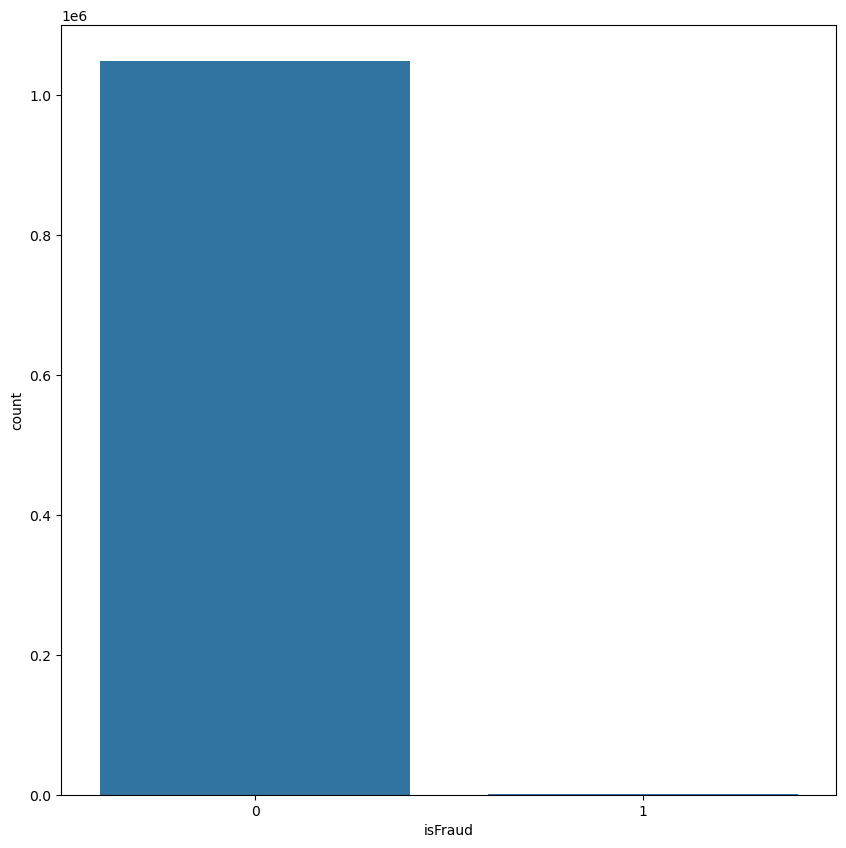

In [117]:
sns.countplot(data, x='isFraud')

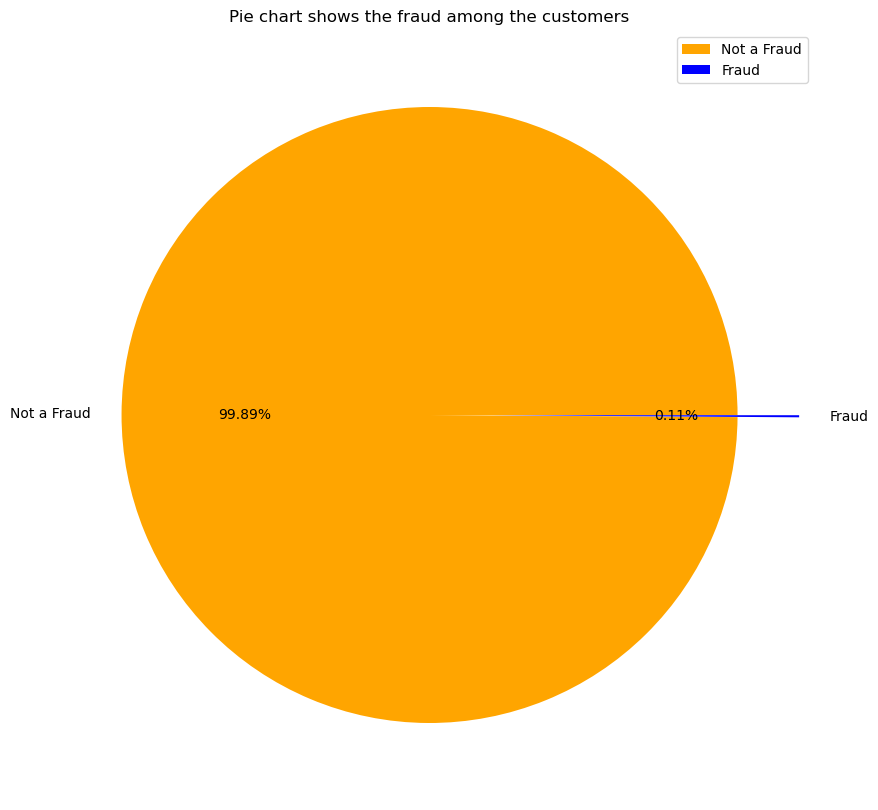

In [118]:
labels = ['Not a Fraud', 'Fraud']
colors = ['orange', 'blue']
size = [1047433, 1142]
explode = [0, 0.2]

plt.pie(size, labels= labels, colors = colors, explode = explode, autopct='%1.2f%%')
plt.legend()
plt.title('Pie chart shows the fraud among the customers')
plt.show()

In [119]:
# no of isFlaggedFraud in the dataset

data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

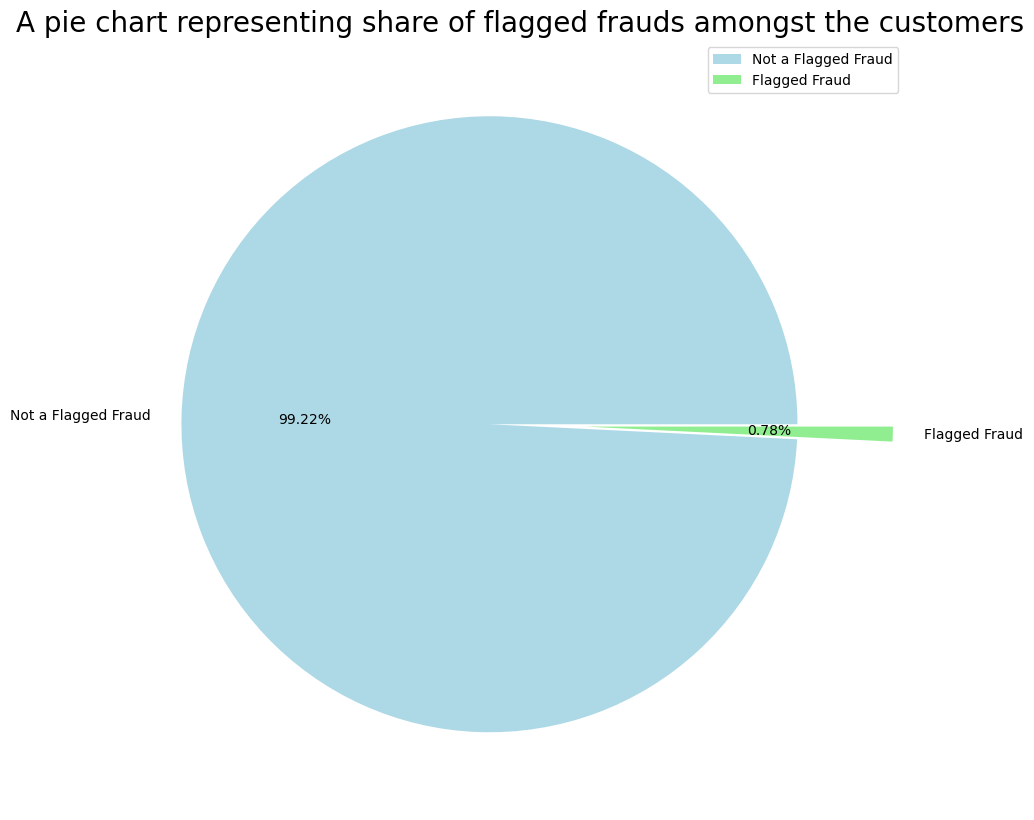

In [120]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'lightgreen']
size = [1048575, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors,explode = explode, autopct='%1.2f%%')
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()

In [121]:
# type of transactions 

data['type'].value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

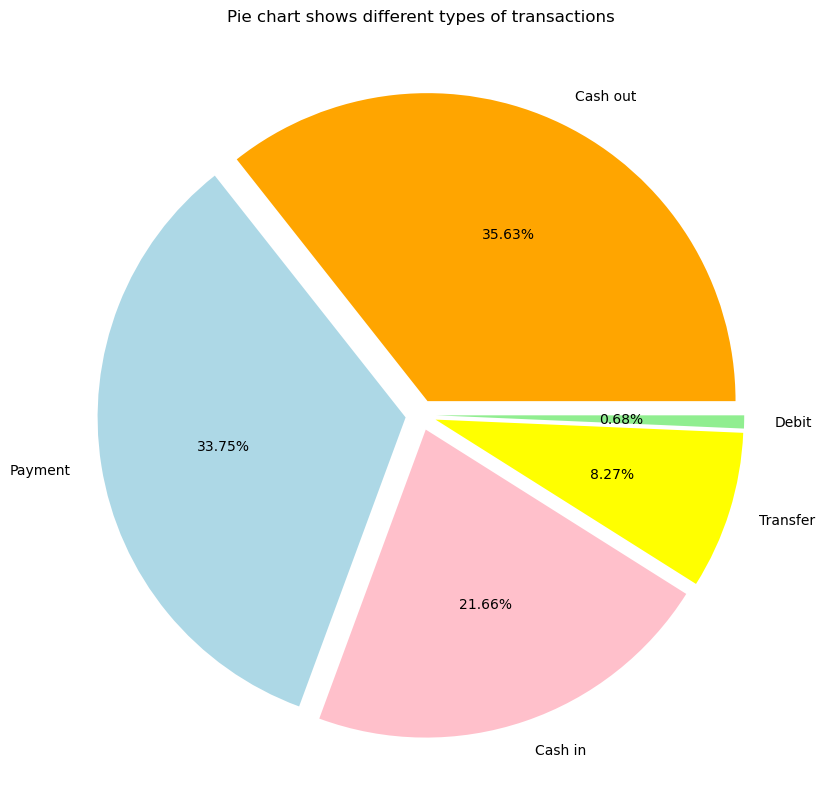

In [122]:
labels = ['Cash out', 'Payment', 'Cash in', 'Transfer', 'Debit']
colors = ['orange', 'lightblue', 'pink','yellow','lightgreen']
size = [373641, 353873, 227130, 86753, 7178]
explode = [0.05, 0.05, 0.05, 0.05, 0.05]

plt.pie(size, labels= labels, colors = colors, explode = explode, autopct='%1.2f%%')
plt.title('Pie chart shows different types of transactions')
plt.show()

In [123]:
# checking different of steps involve in transactions

dataset = data['step'].value_counts().nunique()
dataset

58

C:\Users\HP\AppData\Local\Temp\ipykernel_18672\1719265913.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.step, fit = norm, kde = False)


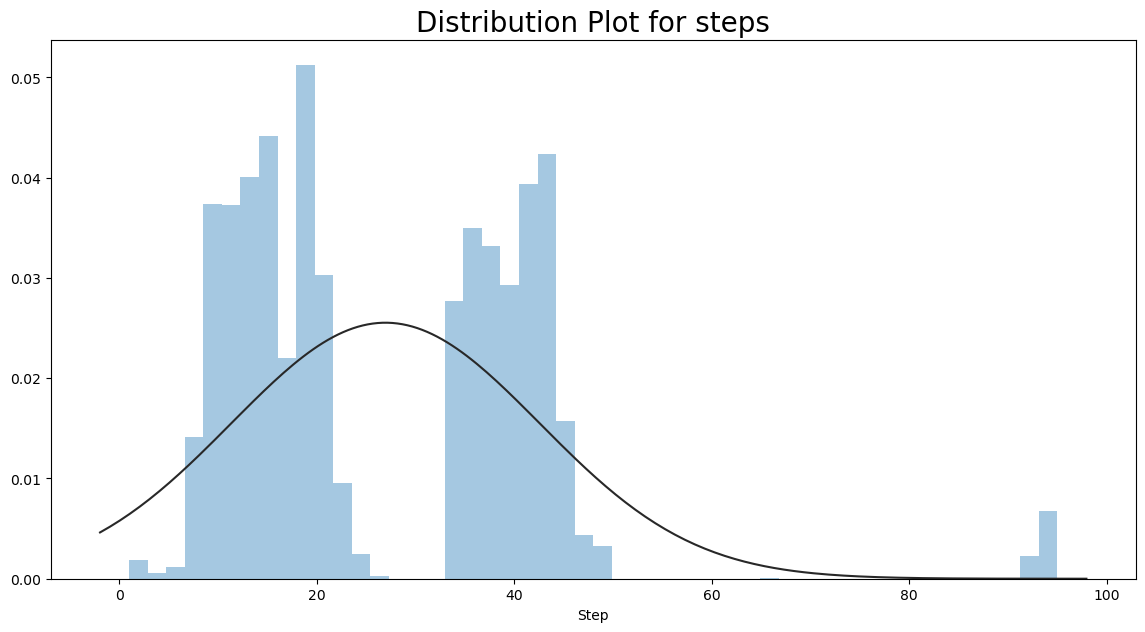

In [124]:
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(data.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

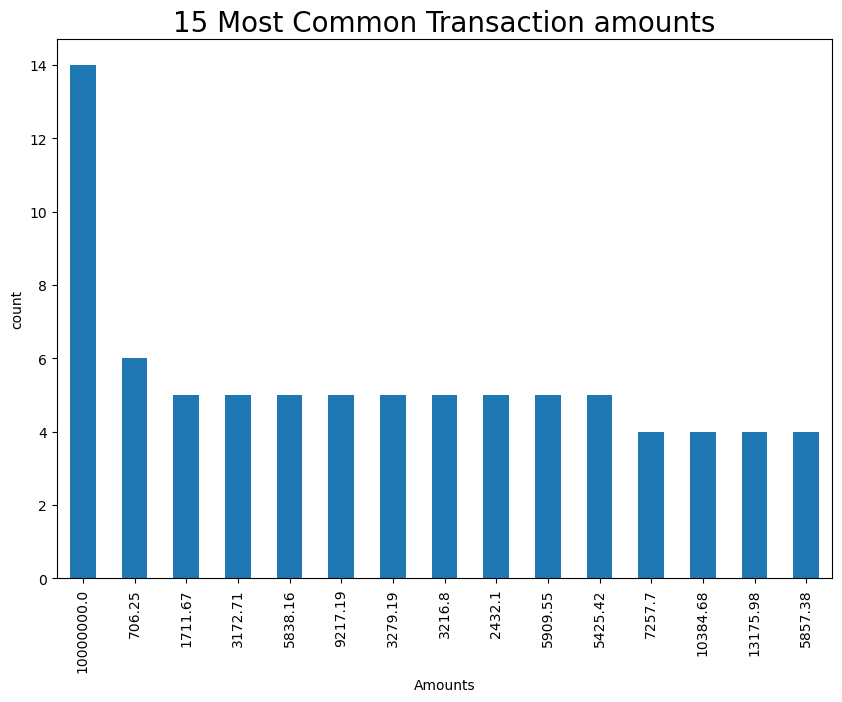

In [125]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

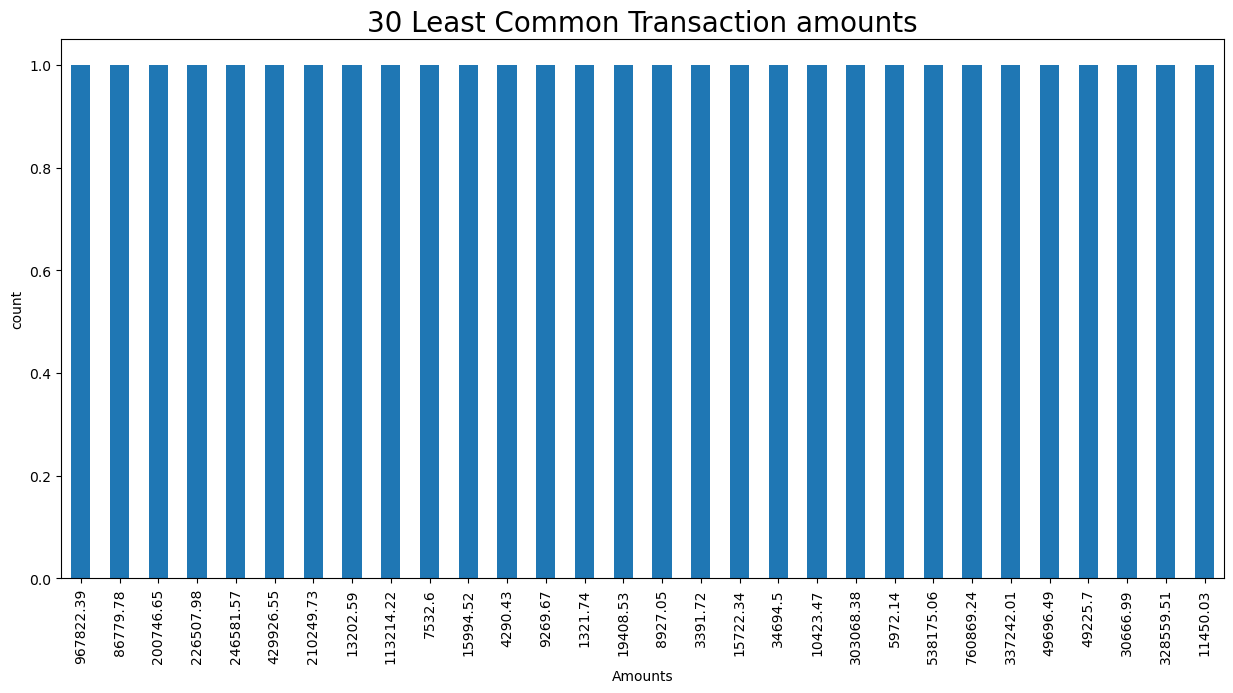

In [126]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (15, 7)

data['amount'].value_counts().tail(30).plot.bar()
plt.title('30 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

In [127]:
# finding  out the types of fraudulent transaction out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [128]:
# figuring out the fraud transfer and fraud cash outs

dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs

print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 564
The number of fraudulent CASH_OUTs = 578


In [129]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0


In [130]:
# Figuring out the transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = data.loc[(data.isFlaggedFraud == 0) & (data.oldbalanceDest == 0) & (data.newbalanceDest == 0)].T
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :                     0            1            2            4        \
step                      1            1            1            1   
type                PAYMENT      PAYMENT     TRANSFER      PAYMENT   
amount              9839.64      1864.28        181.0     11668.14   
nameOrig        C1231006815  C1666544295  C1305486145  C2048537720   
oldbalanceOrg      170136.0      21249.0        181.0      41554.0   
newbalanceOrig    160296.36     19384.72          0.0     29885.86   
nameDest        M1979787155  M2044282225   C553264065  M1230701703   
oldbalanceDest          0.0          0.0          0.0          0.0   
newbalanceDest          0.0          0.0          0.0          0.0   
isFraud                   0            0            1            0   
isFlaggedFraud            0            0            0            0   

                   5           6            7    

In [131]:
# defining a dataset containing only transfer type of transactions

dataTransfer = data.loc[data['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


In [132]:
data['nameDest'].value_counts().head(20)

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
C2083562754    86
C977993101     82
C1360767589    81
C451111351     80
C306206744     79
C97730845      79
C716083600     77
C1899073220    74
C1789550256    73
C667346055     73
C909295153     73
C1023714065    72
C392292416     72
C1234776885    72
C2006081398    70
Name: count, dtype: int64

In [133]:
# making dependent and independent sets

set = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# shape of x
set.shape

(460394, 11)

In [134]:
set.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [135]:
# feature engg.

set['errorBalanceOrig'] = set.newbalanceOrig + set.amount - set.oldbalanceOrg
set['errorBalanceDest'] = set.oldbalanceDest + set.amount - set.newbalanceDest

C:\Users\HP\AppData\Local\Temp\ipykernel_18672\2474383512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set['errorBalanceOrig'] = set.newbalanceOrig + set.amount - set.oldbalanceOrg
C:\Users\HP\AppData\Local\Temp\ipykernel_18672\2474383512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set['errorBalanceDest'] = set.oldbalanceDest + set.amount - set.newbalanceDest


In [136]:
# removing unwanted columns

set = set.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
set.shape

(460394, 11)

In [137]:
# label encoding for the transaction type

set['type'].replace('TRANSFER', 0, inplace = True)
set['type'].replace('CASH_OUT', 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18672\4077652247.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  set['type'].replace('TRANSFER', 0, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18672\4077652247.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [138]:
set.head(15)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.00,0.00,0.00,1,0,0.000000e+00,181.00
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0,0.000000e+00,21363.00
15,1,1,229133.94,15325.00,0.00,5083.00,51513.44,0,0,2.138089e+05,182703.50
19,1,0,215310.30,705.00,0.00,22425.00,0.00,0,0,2.146053e+05,237735.30
24,1,0,311685.89,10835.00,0.00,6267.00,2719172.89,0,0,3.008509e+05,-2401220.00
42,1,1,110414.71,26845.41,0.00,288800.00,2415.16,0,0,8.356930e+04,396799.55
47,1,1,56953.90,1942.02,0.00,70253.00,64106.18,0,0,5.501188e+04,63100.72
48,1,1,5346.89,0.00,0.00,652637.00,6453430.91,0,0,5.346890e+03,-5795447.02
51,1,1,23261.30,20411.53,0.00,25742.00,0.00,0,0,2.849770e+03,49003.30
58,1,0,62610.80,79114.00,16503.20,517.00,8383.29,0,0,0.000000e+00,54744.51


In [139]:
set.isnull().any().any()

False

C:\Users\HP\AppData\Local\Temp\ipykernel_18672\1331829374.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(set['errorBalanceOrig'], color = 'red')
C:\Users\HP\AppData\Local\Temp\ipykernel_18672\1331829374.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(set['errorBalanceDest'], color = 'r

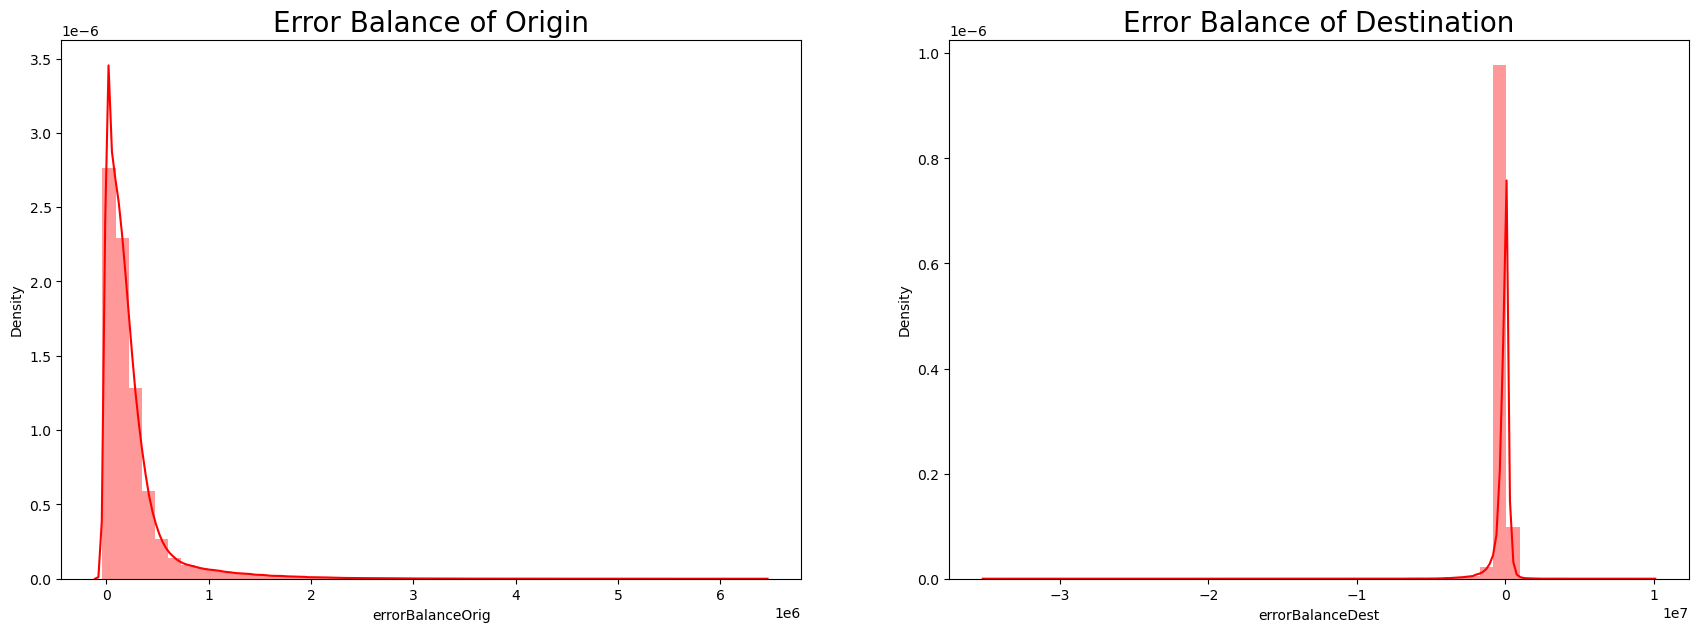

In [140]:
# visualizing the distribution of errorbalance

# setting the size of the plot
plt.rcParams['figure.figsize'] = (21, 7)

plt.subplot(121)
sns.distplot(set['errorBalanceOrig'], color = 'red')
plt.title('Error Balance of Origin', fontsize = 20)

plt.subplot(122)
sns.distplot(set['errorBalanceDest'], color = 'red')
plt.title('Error Balance of Destination', fontsize = 20)

plt.show()

In [141]:
# What are the key factors that predict fraudulent customer?

## Key Factors Predicting Fraudulent Transactions:
1) Transaction Type (type)
Fraud is most common in TRANSFER and CASH_OUT transactions.

2) Transaction Amount (amount)
Larger transaction amounts tend to have a higher likelihood of being fraudulent.

3) Account Balance Behavior
oldbalanceOrg and newbalanceOrig: These indicate whether the origin account had enough balance before the transaction.
Fraud often involves transactions that drain the account or are conducted with zero balance afterward.
    
4) Destination Account Balances (oldbalanceDest, newbalanceDest)
Many frauds target inactive or zero-balance accounts as receivers.

5) Time (step)
Some time periods may show higher fraud activity, often during off-peak hours.



SyntaxError: unmatched ')' (3565517607.py, line 4)

In [ ]:
# Do these factors make sense? If yes, How? If not, How not?

Yes, these factors absolutely make sense in the context of financial fraud detection.

1) Fraudsters typically try to move money quickly or withdraw it before detection. That’s why TRANSFER and CASH_OUT are highly correlated with fraud.
2) If the recipient account is inactive or has zero balance before and after, it might be a temporary or fake account.
3) Larger amounts attract attention from fraudsters, especially if they can extract a significant sum before detection.

In [ ]:
# What kind of prevention should be adopted while company update its infrastructure?

1) Updating infrastructure in a financial company, especially when fraud is involved, needs robust, multi-layered protective mechanisms. 
2) regular checking system.
3) enhanced authentication for risky transactions.
4) integrate machine learning model for analyze transactions.

In [ ]:
# Assuming these actions have been implemented, how would you determine if they work?

fraud prevention measures are in place, measuring their effectiveness is crucial to ensure they’re actually reducing fraud without harming the user experience or business operations.

In [ ]:
THANK YOU
Presented By: JONTY DUTTA